In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline
print("package import")

package import


# Load MNIST

In [2]:
mnist = input_data.read_data_sets('data/', one_hot=True)
trainImg = mnist.train.images
trainLabel = mnist.train.labels
testImg = mnist.test.images
testLabel = mnist.test.labels
print("data setting")

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
data setting


In [3]:
print(trainImg.shape[1])

784


# Define CNN

In [4]:
n_input = 784
n_output = 10
w = {
    'c1':tf.Variable(tf.random_normal([3,3,1,64], stddev=0.1)), #3x3x1 64개
    'd1':tf.Variable(tf.random_normal([14*14*64, n_output], stddev=0.1))
}
b = {
    'c1':tf.Variable(tf.random_normal([64], stddev=0.1)),
    'd1':tf.Variable(tf.random_normal([n_output], stddev=0.1))
}
print(w['d1'].get_shape())
print(14*14*64)
def CNN(_input,_w,_b):
    #reshape input data
    _input_r = tf.reshape(_input, shape=[-1,28,28,1])
    #build convolution layer
    _conv1 = tf.nn.conv2d(_input_r, _w['c1'], strides=[1,1,1,1], padding="SAME")
    _conv2 = tf.nn.bias_add(_conv1, _b['c1'])
    _conv3 = tf.nn.relu(_conv2)
    _pool = tf.nn.max_pool(_conv3, strides=[1,2,2,1], ksize=[1,2,2,1], padding="SAME")
    
    #fully connected layer
    _dens = tf.reshape(_pool, [-1,14*14*64])
    _out = tf.add(tf.matmul(_dens, _w['d1']), _b['d1'])
    out = {
        'input_r':_input_r, 'conv1':_conv1, 'conv2':_conv2, 'conv3':_conv3,
        'pool':_pool, 'dense':_dens, 'out':_out
    }
    return out
    

(12544, 10)
12544


# Define Graph

In [5]:
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

learning_rate = 0.001
epochs_size = 5
batch_size = 100
display_step = 1
save_step = 1

pre = CNN(x, w, b)['out']
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pre, labels=y))
optm = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
_cor = tf.equal(tf.arg_max(y,1), tf.arg_max(pre, 1))
accr = tf.reduce_mean(tf.cast(_cor, tf.float32))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#Saver
save_dir = "nets/"
saver = tf.train.Saver(max_to_keep=3)

# OPTIMIZE

In [6]:
for epoch in range(epochs_size):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    for step in range(total_batch):
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optm, feed_dict={x:batch_xs, y:batch_ys})
        avg_cost += sess.run(cost, feed_dict={x:batch_xs, y:batch_ys})
    if epoch % display_step == 0:
        train_accr = sess.run(accr,feed_dict={x:batch_xs, y:batch_ys})
        print("train accurracy is %.9f"%(train_accr))
        test_accr = sess.run(accr,feed_dict={x:testImg, y:testLabel})
        print("test accurracy is %.3f"%(test_accr))
    if epoch % save_step == 0:
        saver.save(sess, "nets/cnn_mnist.ckpt-"+str(epoch))
print("finish training")

train accurracy is 0.970000029
test accurracy is 0.962
train accurracy is 0.990000010
test accurracy is 0.976
train accurracy is 1.000000000
test accurracy is 0.978
train accurracy is 0.970000029
test accurracy is 0.979
train accurracy is 0.980000019
test accurracy is 0.980
finish training


# Restore Network

In [15]:
epoch = 4
saver.restore(sess, "nets/cnn_mnist.ckpt-"+str(epoch))

(1, 784)


In [16]:
test_conv = CNN(x, w, b)

input_r = sess.run(test_conv['input_r'], feed_dict={x:testImg[:1]})
conv1 = sess.run(test_conv['conv1'], feed_dict={x:testImg[:1]})
conv2 = sess.run(test_conv['conv2'], feed_dict={x:testImg[:1]})
conv3= sess.run(test_conv['conv3'], feed_dict={x:testImg[:1]})
pool = sess.run(test_conv['pool'], feed_dict={x:testImg[:1]})
dens = sess.run(test_conv['dense'], feed_dict={x:testImg[:1]})
out = sess.run(test_conv['out'], feed_dict={x:testImg[:1]})

# INPUT

('size : ', (1, 28, 28, 1))
label is 7


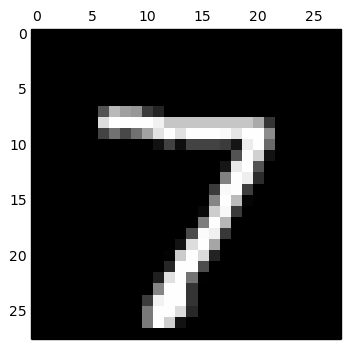

In [25]:
print("size of input data : ",(input_r.shape))
label = np.argmax(testLabel[0])
print("label is %d"%label)

plt.matshow(input_r[0,:,:,0],cmap = plt.get_cmap('gray'))
plt.colorbar
plt.show()

('size of conv1 : ', (1, 28, 28, 1))
label is 7


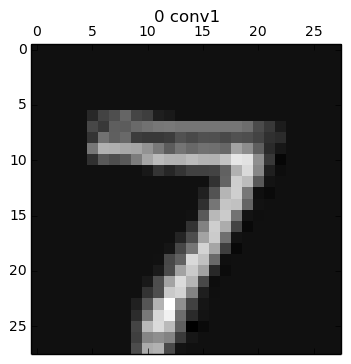

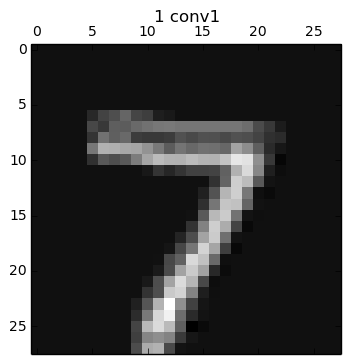

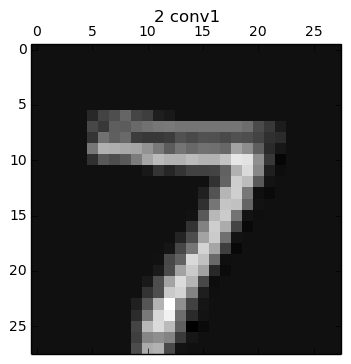

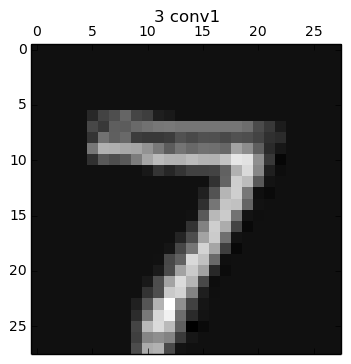

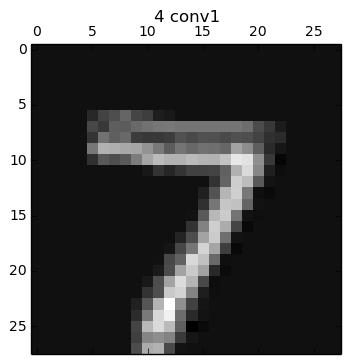

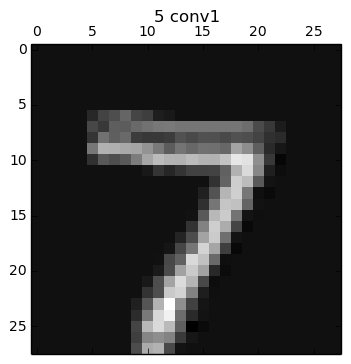

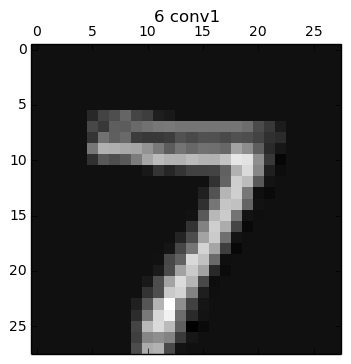

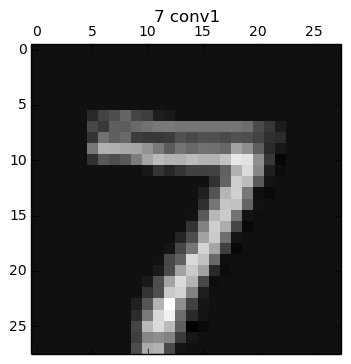

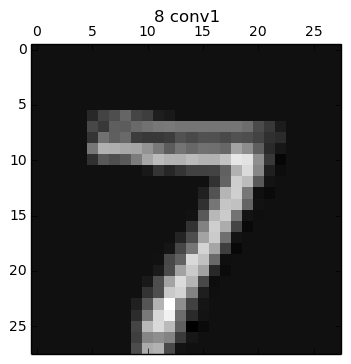

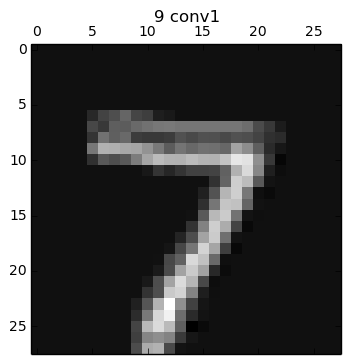

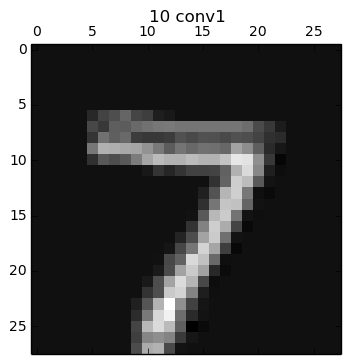

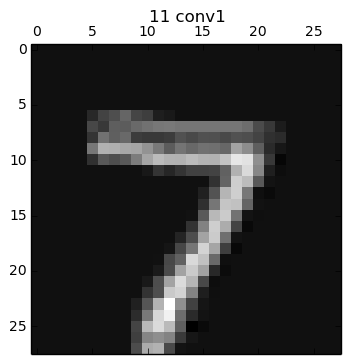

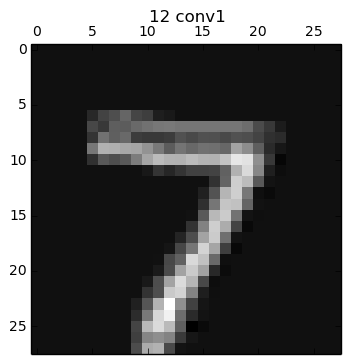

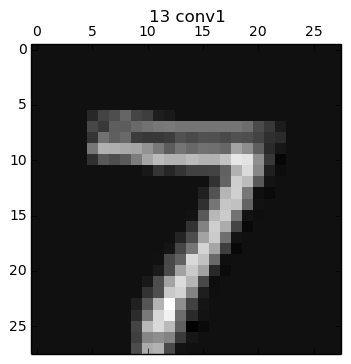

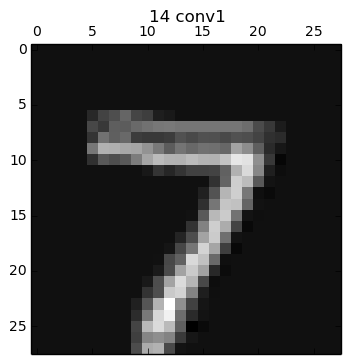

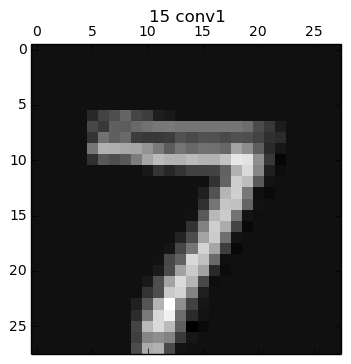

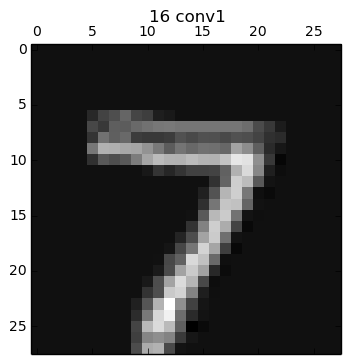

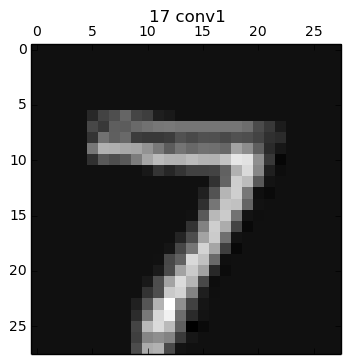

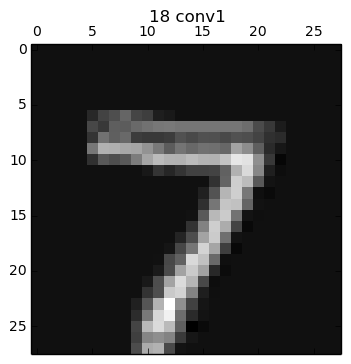

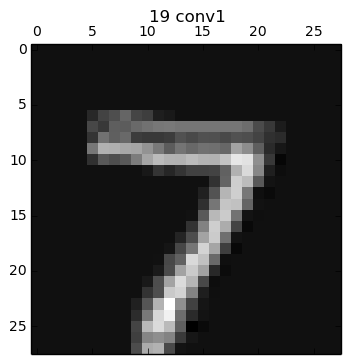

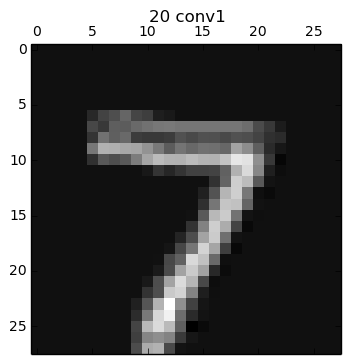

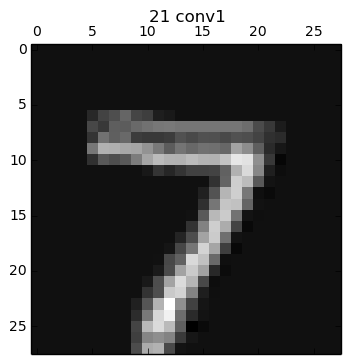

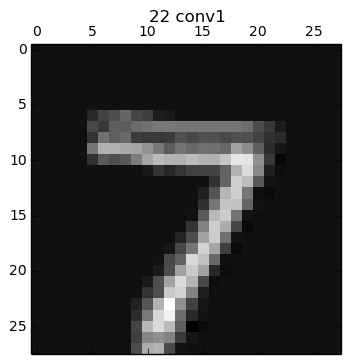

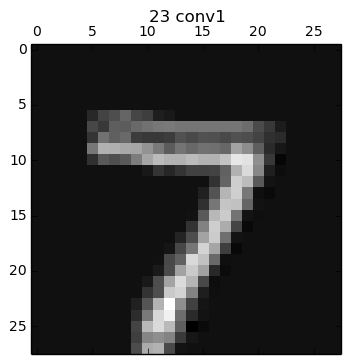

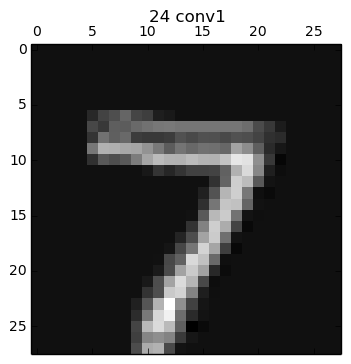

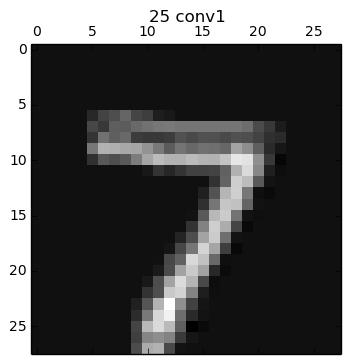

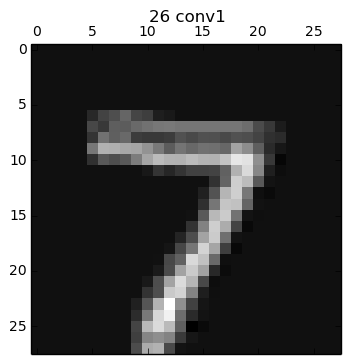

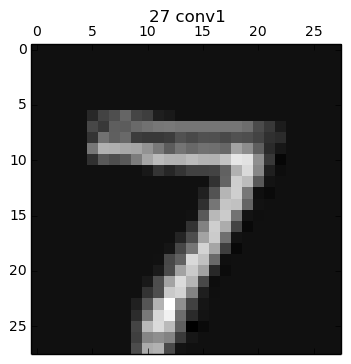

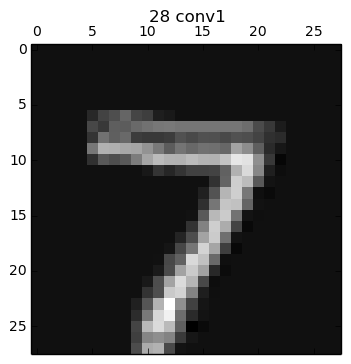

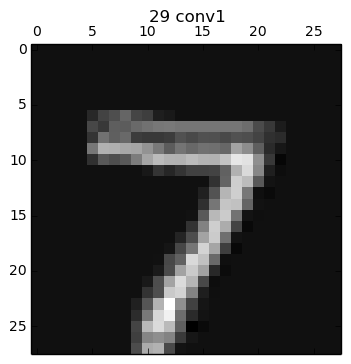

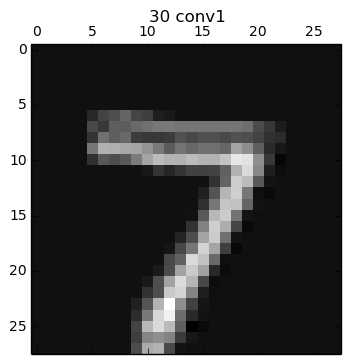

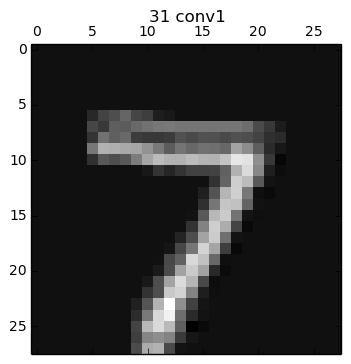

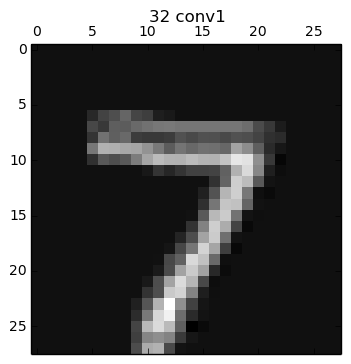

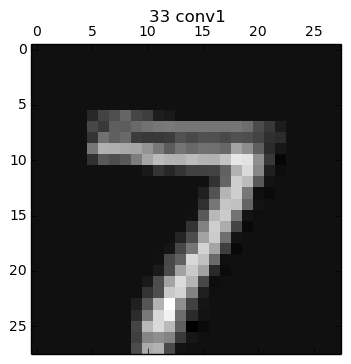

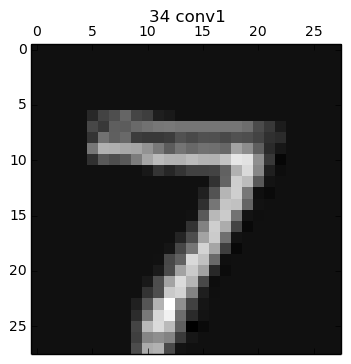

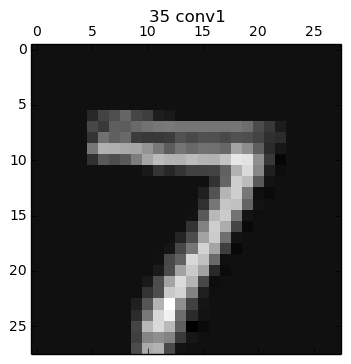

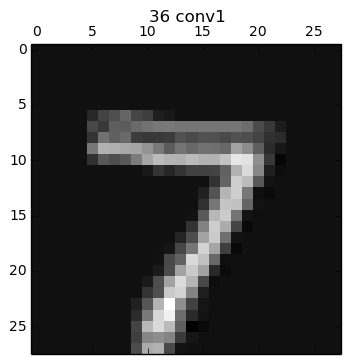

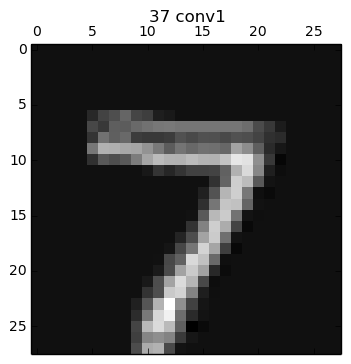

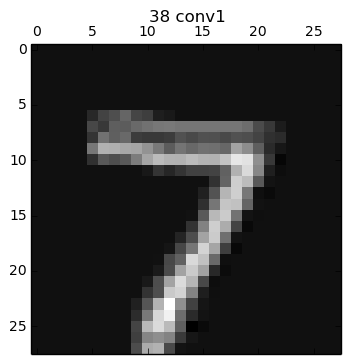

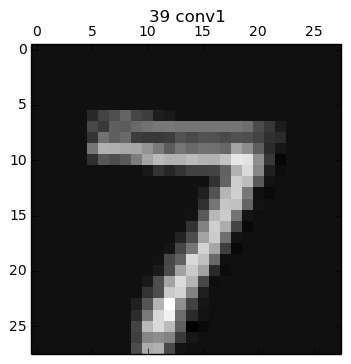

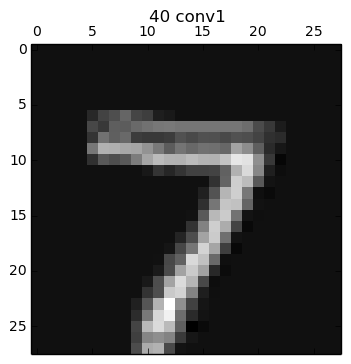

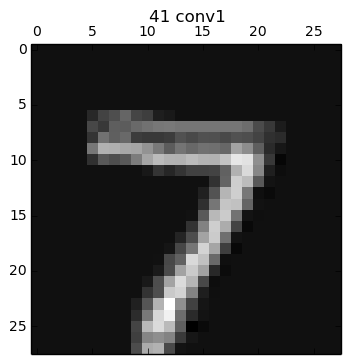

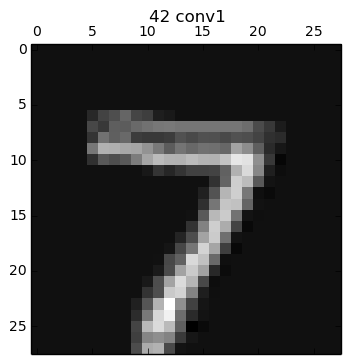

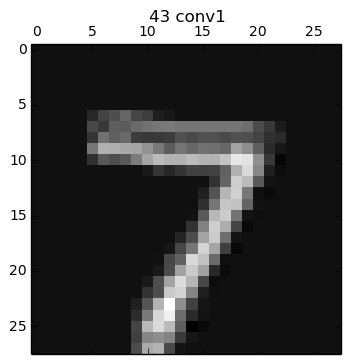

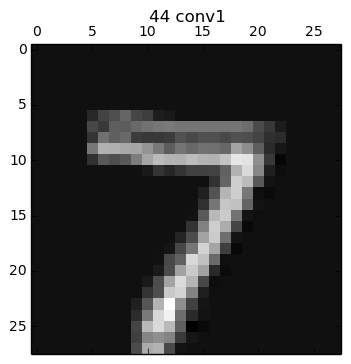

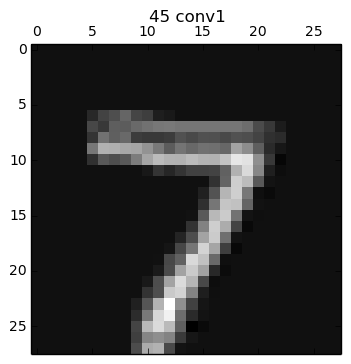

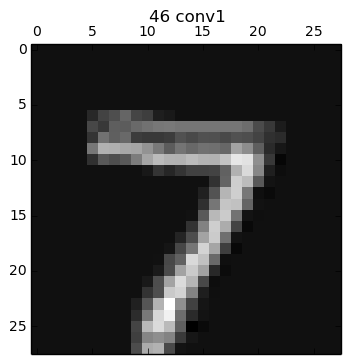

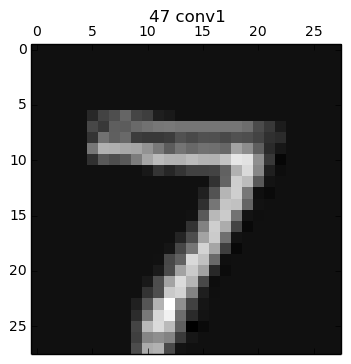

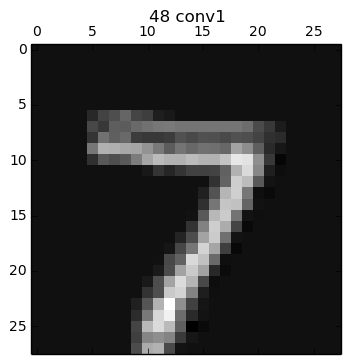

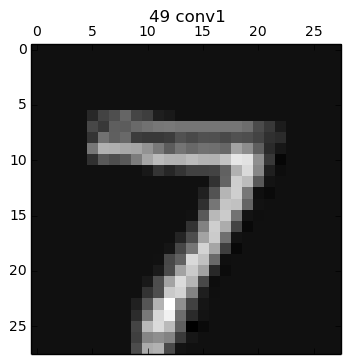

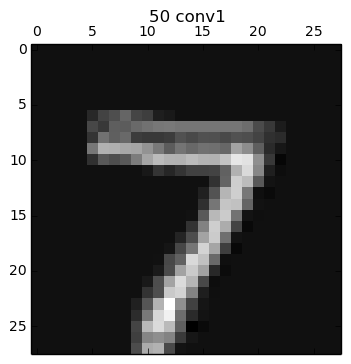

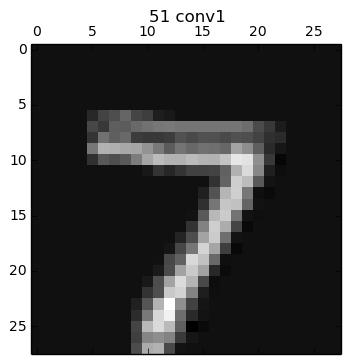

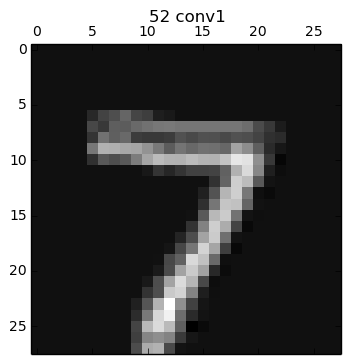

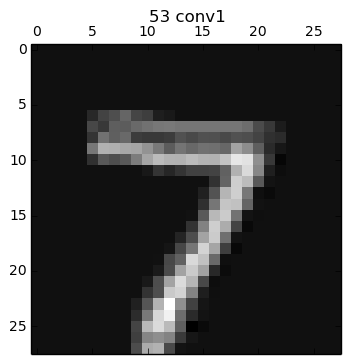

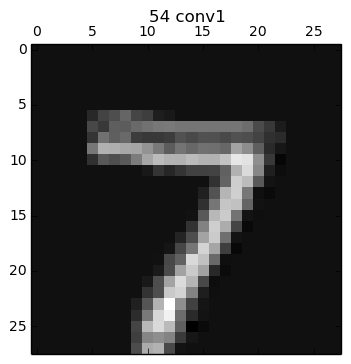

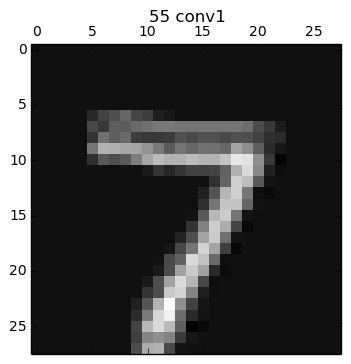

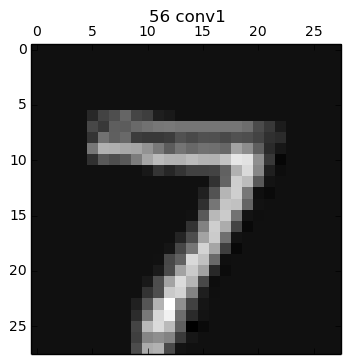

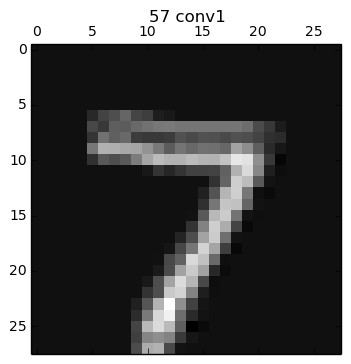

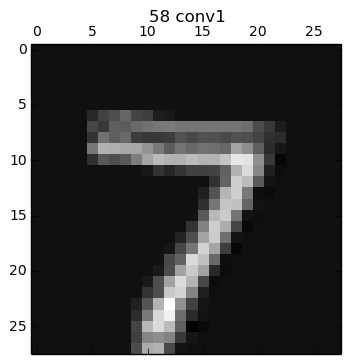

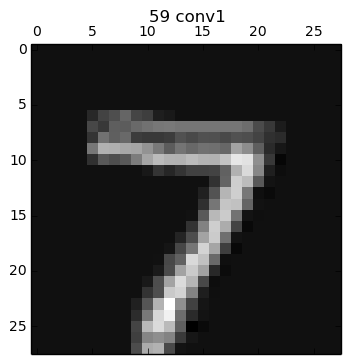

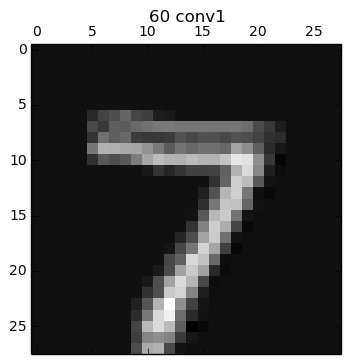

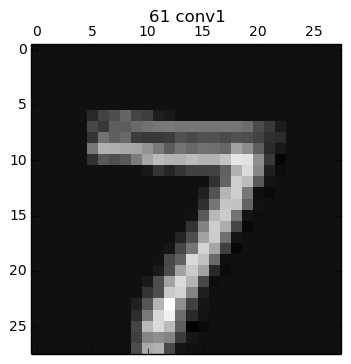

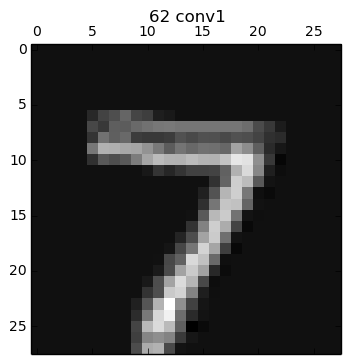

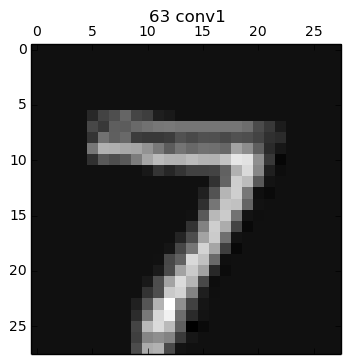

In [26]:
print("size of conv1 : ",(conv1.shape))
label = np.argmax(testLabel[0])
print("label is %d"%label)

for i in range(64):
    plt.matshow(conv1[0,:,:,0],cmap = plt.get_cmap('gray'))
    plt.title('%d conv1'%i)
    plt.colorbar
    plt.show()

('size of conv2 : ', (1, 28, 28, 64))


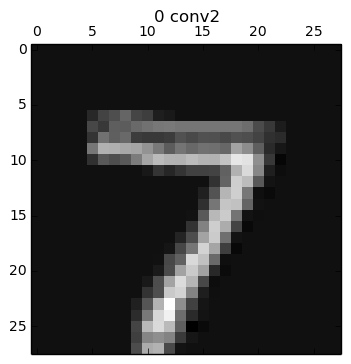

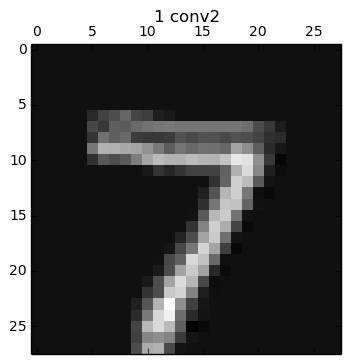

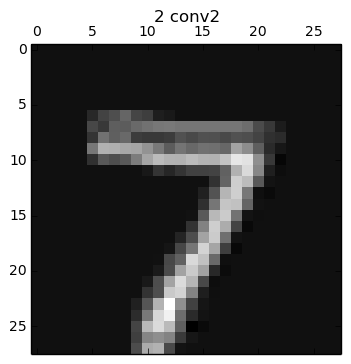

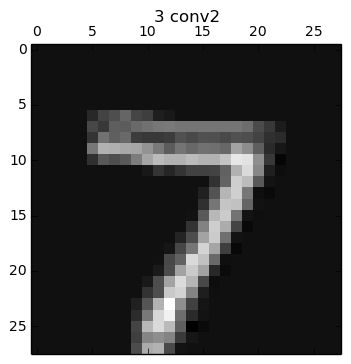

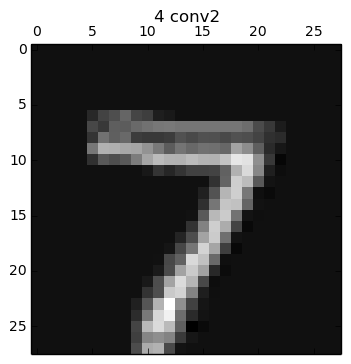

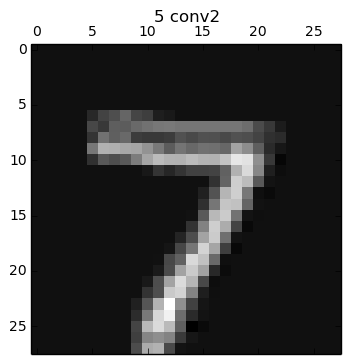

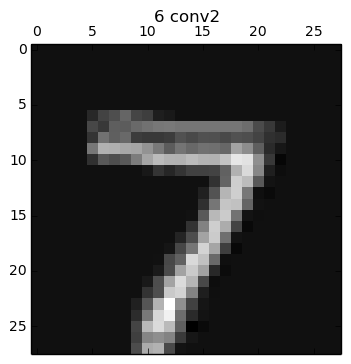

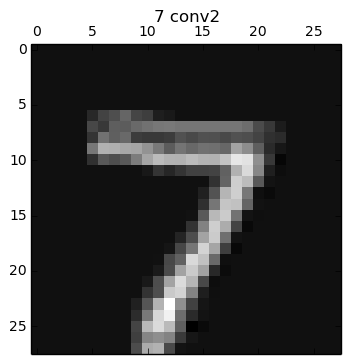

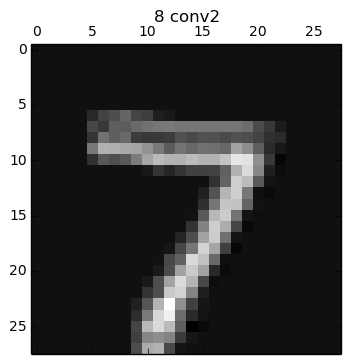

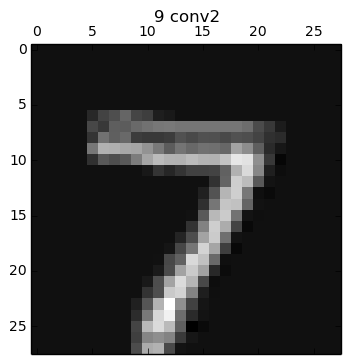

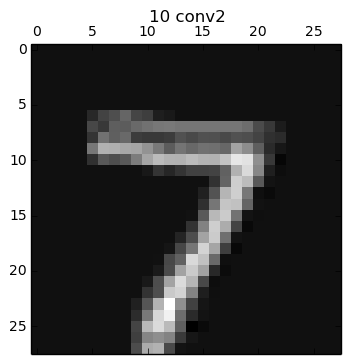

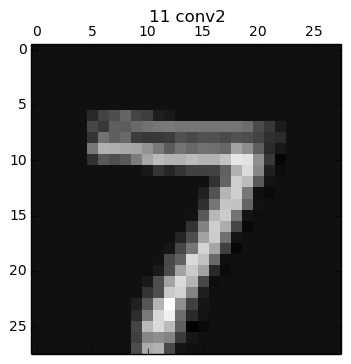

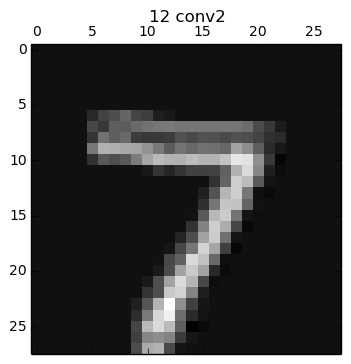

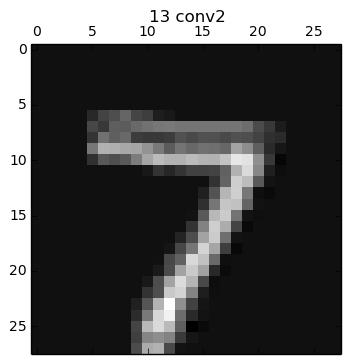

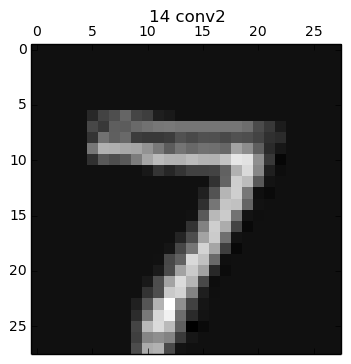

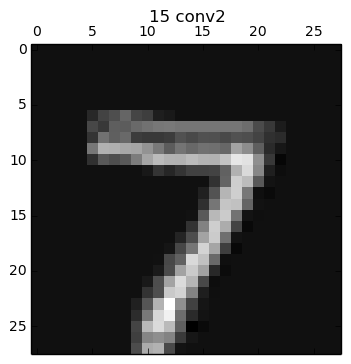

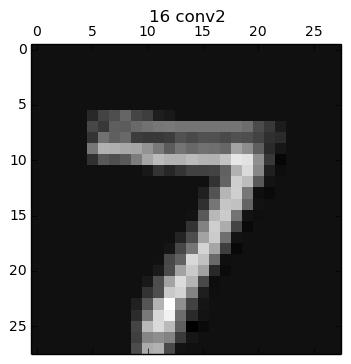

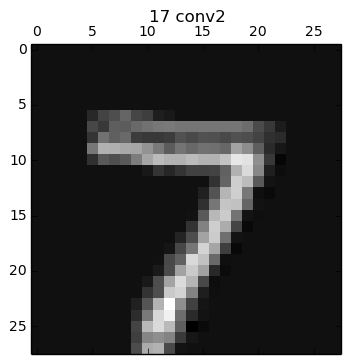

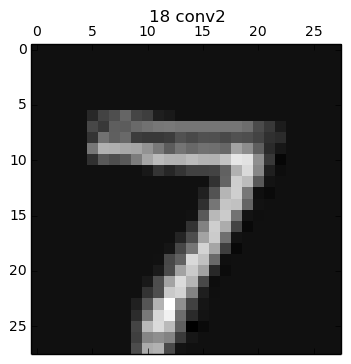

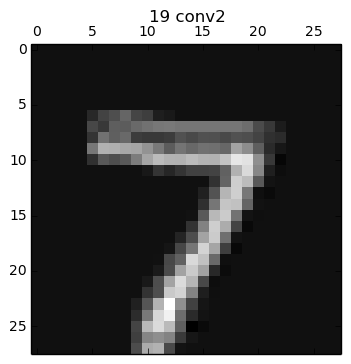

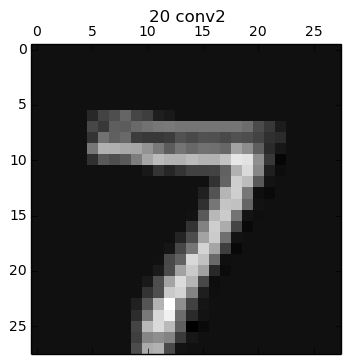

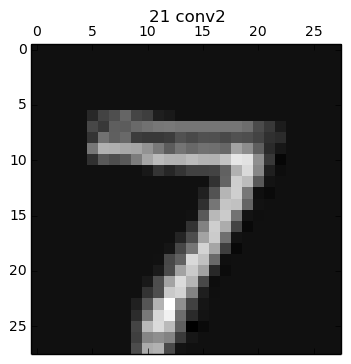

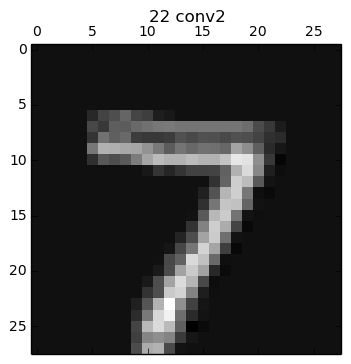

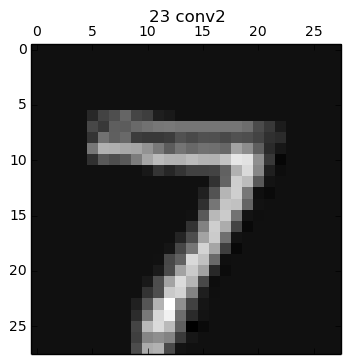

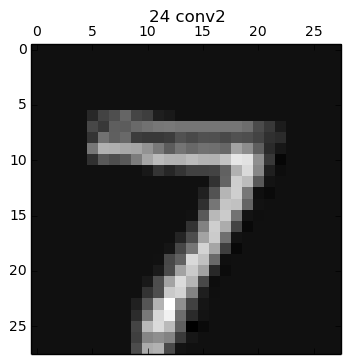

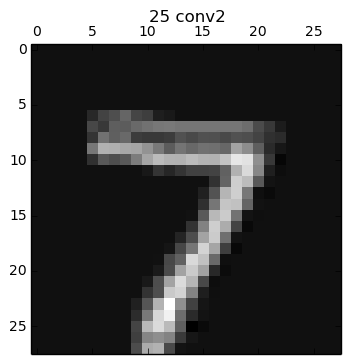

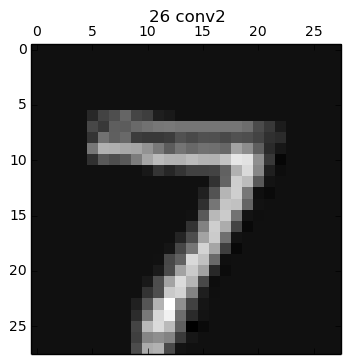

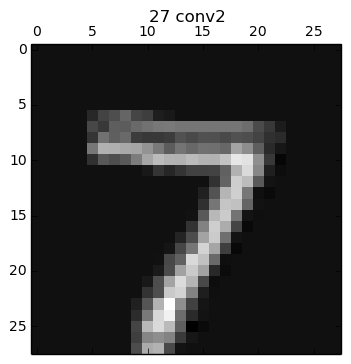

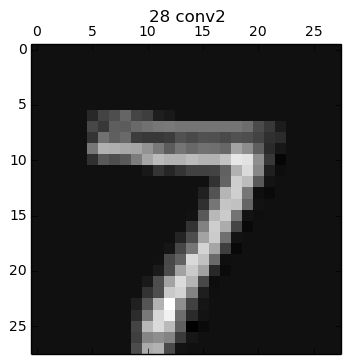

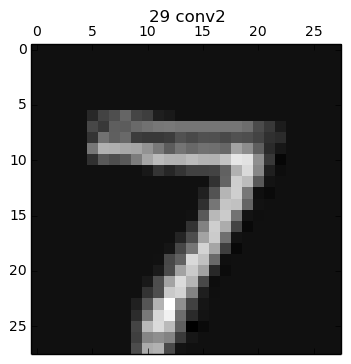

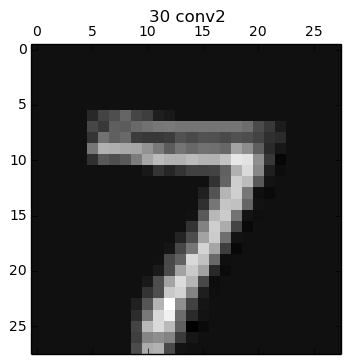

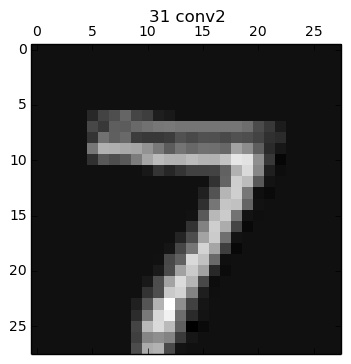

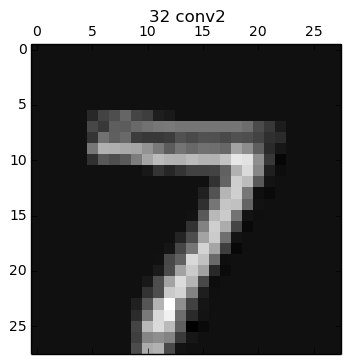

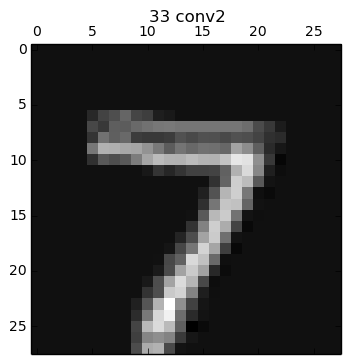

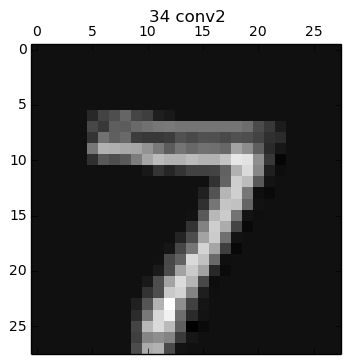

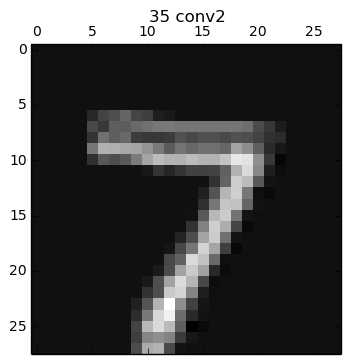

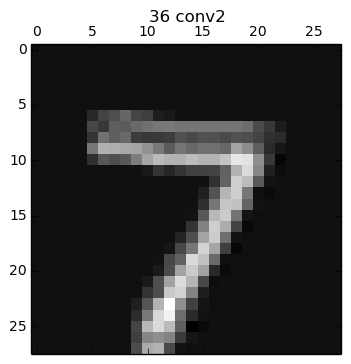

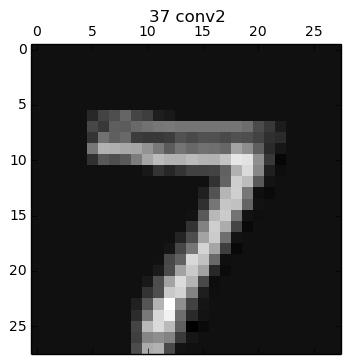

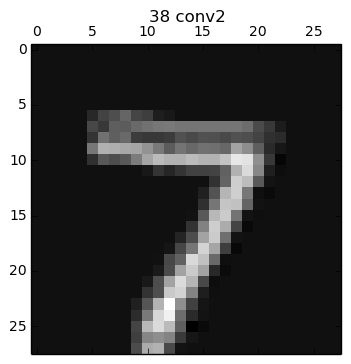

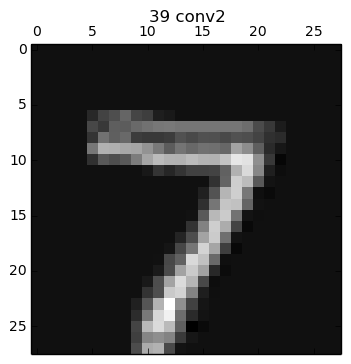

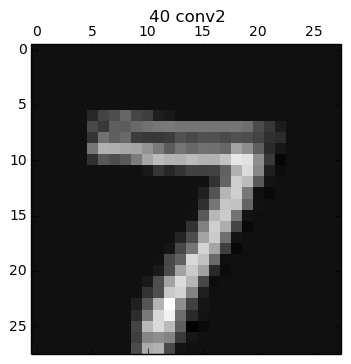

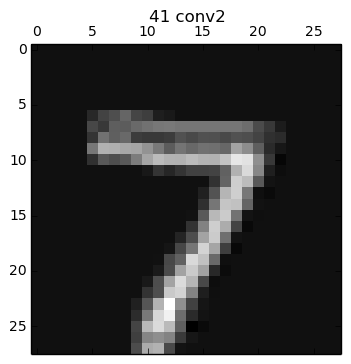

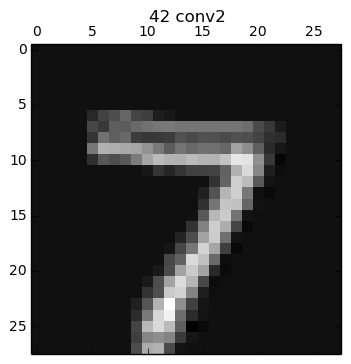

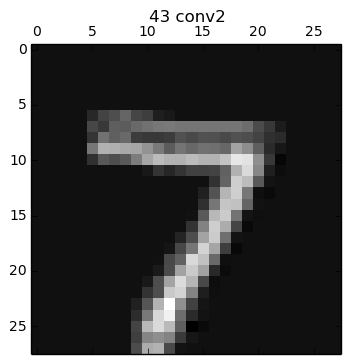

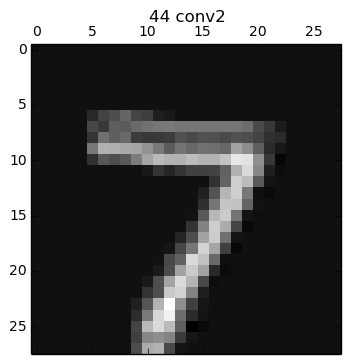

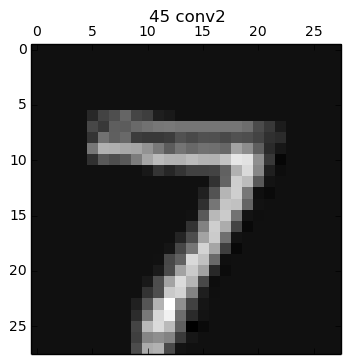

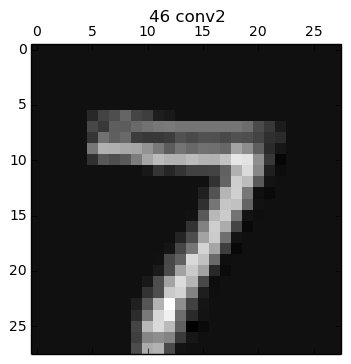

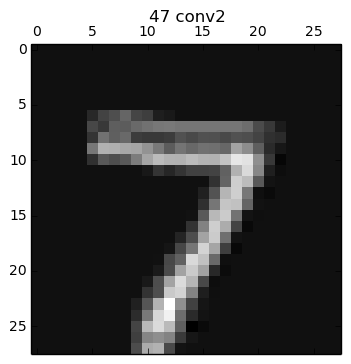

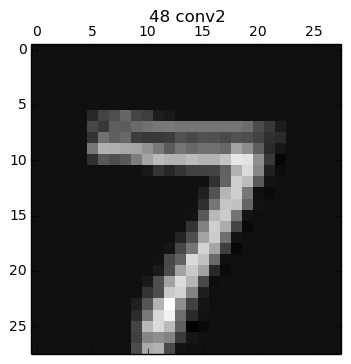

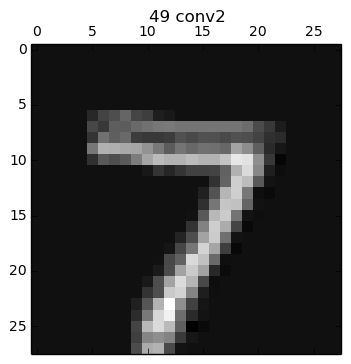

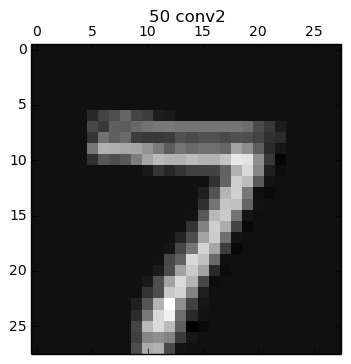

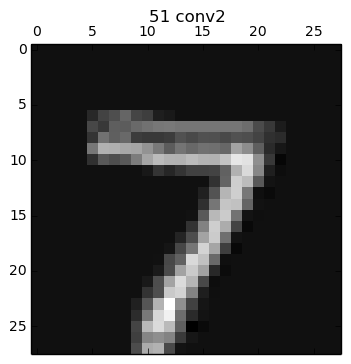

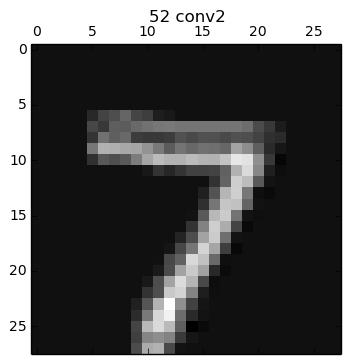

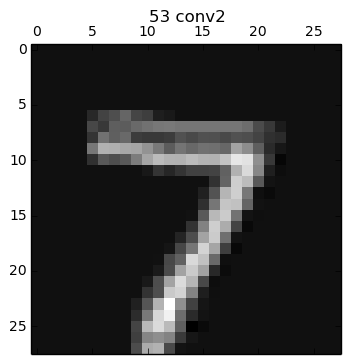

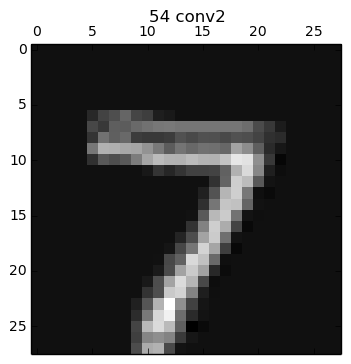

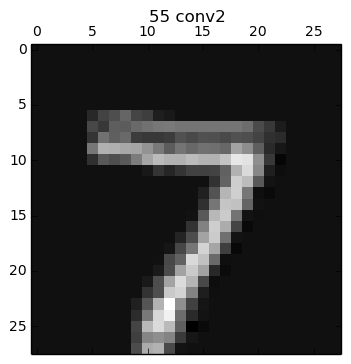

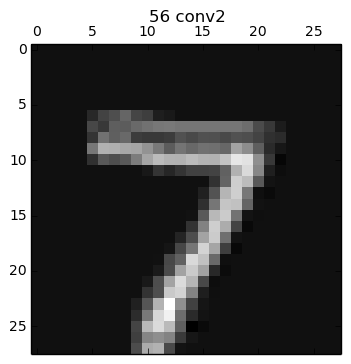

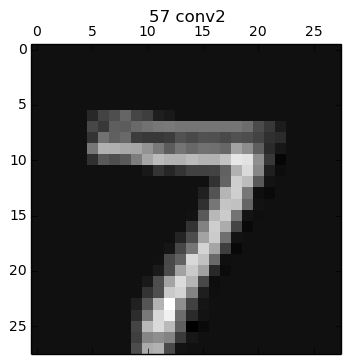

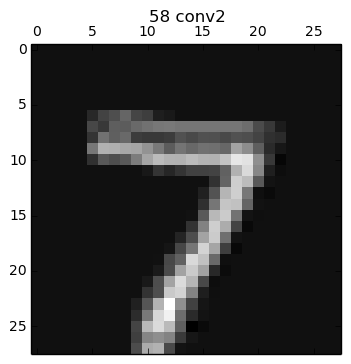

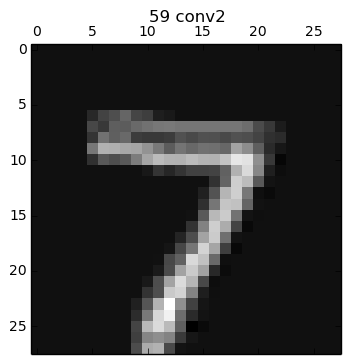

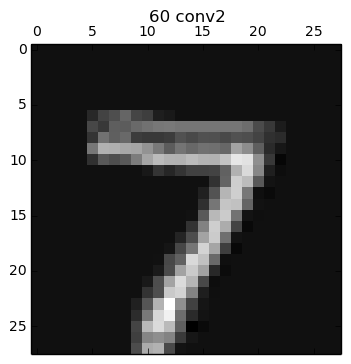

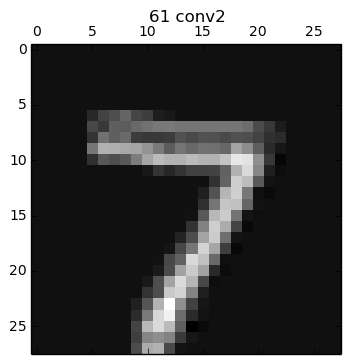

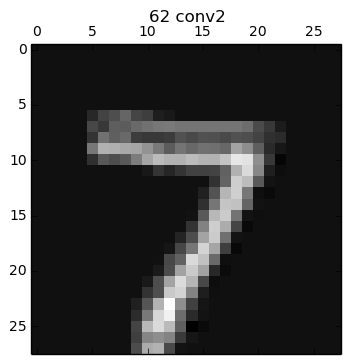

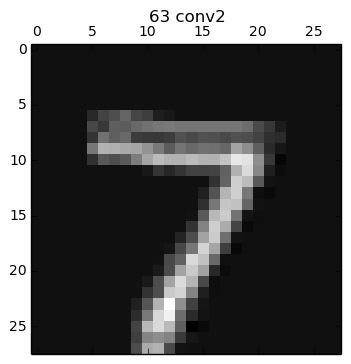

In [27]:
print("size of conv2 : ",(conv2.shape))

for i in range(64):
    plt.matshow(conv2[0,:,:,0],cmap = plt.get_cmap('gray'))
    plt.title('%d conv2'%i)
    plt.colorbar
    plt.show()

In [30]:
result = np.argmax(out, 1)
print("predict : ",result)

('predict : ', array([7]))
